In [227]:
# Relevant libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline


### Importing Datasets

In [228]:
train_df = pd.read_csv('titanic/train.csv')
test_df = pd.read_csv('titanic/test.csv')

### Exploring Training Data

In [229]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [230]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [231]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [232]:
# taking a look at all categorical data columns

train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [233]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [234]:
train_df.groupby(['Pclass'], as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [235]:
train_df.groupby(['Sex'], as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [236]:
train_df.groupby(['SibSp'], as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [237]:
train_df.groupby(['Parch'], as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [238]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1


In [239]:
train_df['FamilySize'].describe()

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: FamilySize, dtype: float64

In [240]:
train_df.groupby(['FamilySize'], as_index=False)['Survived'].mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [241]:
family_size_map = {
    1: 'Alone',
    2: 'Very Smalll',
    3: 'Small',
    4: 'Small-Medium',
    5: 'Medium',
    6: 'Medium',
    7: 'Medium-Large',
    8: 'Large',
    9: 'Large', 
    10: 'Very Large',
    11: 'Very Large'
}

In [242]:
train_df['FamilySizeGroup'] = train_df['FamilySize'].map(family_size_map)
test_df['FamilySizeGroup'] = test_df['FamilySize'].map(family_size_map)

In [243]:
train_df.groupby(['FamilySizeGroup'], as_index=False)['Survived'].mean()

,FamilySizeGroup,Survived
0,Alone,0.303538
1,Large,0.000000
2,Medium,0.162162
3,Medium-Large,0.333333
4,Small,0.578431
5,Small-Medium,0.724138
6,Very Large,0.000000
7,Very Smalll,0.552795


In [244]:

train_df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

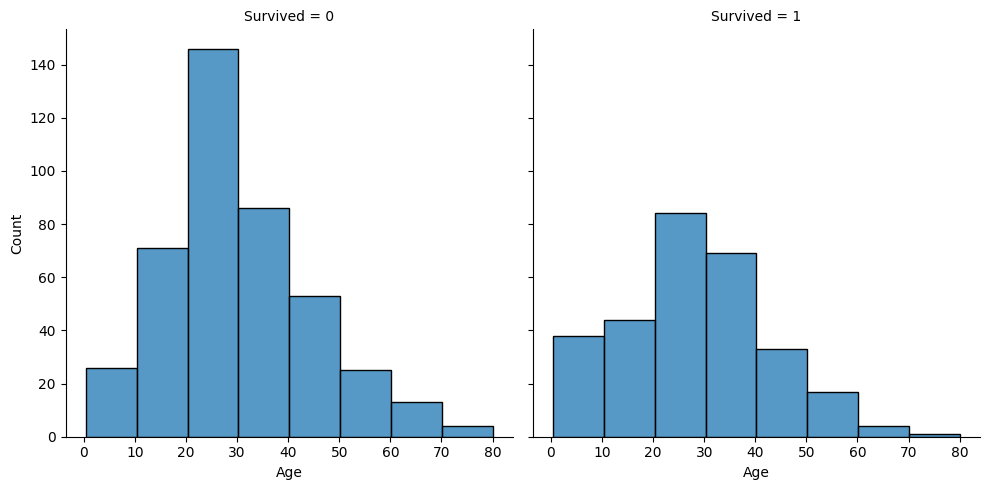

In [245]:
sns.displot(train_df, x='Age', col='Survived', binwidth=10, height=5);

In [246]:
train_df['Age Cut'] = pd.qcut(train_df['Age'], 8)
test_df['Age Cut'] = pd.qcut(test_df['Age'], 8)

In [247]:
train_df.groupby('Age Cut')['Survived'].mean()

/var/folders/45/xrxp1w5d28gfw_8gw1_nzk8w0000gn/T/ipykernel_85583/1937183490.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby('Age Cut')['Survived'].mean()


Age Cut
(0.419, 16.0]     0.550000
(16.0, 20.125]    0.341772
(20.125, 24.0]    0.367347
(24.0, 28.0]      0.352941
(28.0, 32.312]    0.416667
(32.312, 38.0]    0.450549
(38.0, 47.0]      0.329545
(47.0, 80.0]      0.415730
Name: Survived, dtype: float64

In [248]:
train_df.loc[train_df['Age'] <= 16, 'Age'] = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 20.125), 'Age'] = 1
train_df.loc[(train_df['Age'] > 20.125) & (train_df['Age'] <= 24.0), 'Age'] = 2
train_df.loc[(train_df['Age'] > 24.0) & (train_df['Age'] <= 28.0), 'Age'] = 3
train_df.loc[(train_df['Age'] > 28.0) & (train_df['Age'] <= 32.312), 'Age'] = 4
train_df.loc[(train_df['Age'] > 32.312) & (train_df['Age'] <= 38.0), 'Age'] = 5
train_df.loc[(train_df['Age'] > 38.0) & (train_df['Age'] <= 47.0), 'Age'] = 6
train_df.loc[(train_df['Age'] > 47.0) & (train_df['Age'] <= 80.0), 'Age'] = 7
train_df.loc[(train_df['Age'] > 80), 'Age']


test_df.loc[test_df['Age'] <= 16, 'Age'] = 0
test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 20.125), 'Age'] = 1
test_df.loc[(test_df['Age'] > 20.125) & (test_df['Age'] <= 24.0), 'Age'] = 2
test_df.loc[(test_df['Age'] > 24.0) & (test_df['Age'] <= 28.0), 'Age'] = 3
test_df.loc[(test_df['Age'] > 28.0) & (test_df['Age'] <= 32.312), 'Age'] = 4
test_df.loc[(test_df['Age'] > 32.312) & (test_df['Age'] <= 38.0), 'Age'] = 5
test_df.loc[(test_df['Age'] > 38.0) & (test_df['Age'] <= 47.0), 'Age'] = 6
test_df.loc[(test_df['Age'] > 47.0) & (test_df['Age'] <= 80.0), 'Age'] = 7
test_df.loc[(test_df['Age'] > 80), 'Age']

Series([], Name: Age, dtype: float64)

In [249]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilySizeGroup,Age Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S,2,Very Smalll,"(20.125, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,71.2833,C85,C,2,Very Smalll,"(32.312, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,53.1000,C123,S,2,Very Smalll,"(32.312, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,8.0500,NaN,S,1,Alone,"(32.312, 38.0]"


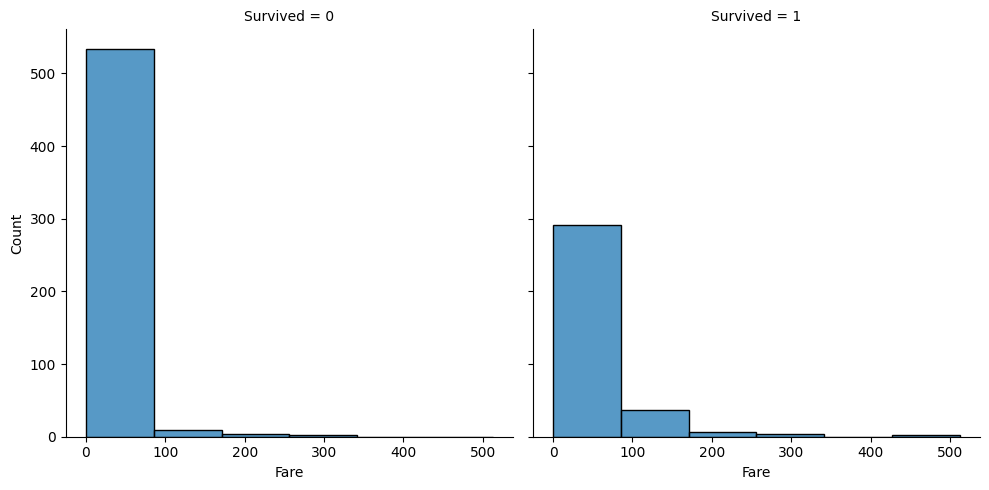

In [250]:
sns.displot(train_df, x='Fare', col='Survived', binwidth=80, height=5)

In [251]:
train_df['Fare Cut'] = pd.qcut(train_df['Fare'], 6)
test_df['Fare Cut'] = pd.qcut(test_df['Fare'], 6)

In [252]:
train_df.groupby('Fare Cut')['Survived'].mean()

/var/folders/45/xrxp1w5d28gfw_8gw1_nzk8w0000gn/T/ipykernel_85583/1504073505.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby('Fare Cut')['Survived'].mean()


Fare Cut
(-0.001, 7.775]      0.205128
(7.775, 8.662]       0.190789
(8.662, 14.454]      0.366906
(14.454, 26.0]       0.436242
(26.0, 52.369]       0.417808
(52.369, 512.329]    0.697987
Name: Survived, dtype: float64

In [253]:
train_df.loc[train_df['Fare'] <= 7.775, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.775) & (train_df['Fare'] <= 8.662), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 8.662) & (train_df['Fare'] <= 14.454), 'Fare'] = 2
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 26.0), 'Fare'] = 3
train_df.loc[(train_df['Fare'] > 26.0) & (train_df['Fare'] <= 52.369), 'Fare'] = 4
train_df.loc[(train_df['Fare'] > 52.369) & (train_df['Fare'] <= 512.329), 'Fare'] = 5
train_df.loc[(train_df['Fare'] > 512.329), 'Fare'] = 6


test_df.loc[test_df['Fare'] <= 7.775, 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 7.775) & (test_df['Fare'] <= 8.662), 'Fare'] = 1
test_df.loc[(test_df['Fare'] > 8.662) & (test_df['Fare'] <= 14.454), 'Fare'] = 2
test_df.loc[(test_df['Fare'] > 14.454) & (test_df['Fare'] <= 26.0), 'Fare'] = 3
test_df.loc[(test_df['Fare'] > 26.0) & (test_df['Fare'] <= 52.369), 'Fare'] = 4
test_df.loc[(test_df['Fare'] > 52.369) & (test_df['Fare'] <= 512.329), 'Fare'] = 5
test_df.loc[(test_df['Fare'] > 512.329), 'Fare'] = 6

In [254]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilySizeGroup,Age Cut,Fare Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,NaN,S,2,Very Smalll,"(20.125, 24.0]","(-0.001, 7.775]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,C85,C,2,Very Smalll,"(32.312, 38.0]","(52.369, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,C123,S,2,Very Smalll,"(32.312, 38.0]","(52.369, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,NaN,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]"


In [255]:
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [256]:
train_df['Title'] = train_df['Name'].str.split(pat=',', expand=True)[1].str.split(pat='.', expand=True)[0].apply(lambda x: x.strip())
test_df['Title'] = test_df['Name'].str.split(pat=',', expand=True)[1].str.split(pat='.', expand=True)[0].apply(lambda x: x.strip())


In [257]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilySizeGroup,Age Cut,Fare Cut,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,NaN,S,2,Very Smalll,"(20.125, 24.0]","(-0.001, 7.775]",Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,C85,C,2,Very Smalll,"(32.312, 38.0]","(52.369, 512.329]",Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,C123,S,2,Very Smalll,"(32.312, 38.0]","(52.369, 512.329]",Mrs
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,NaN,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr


In [258]:
train_df.groupby('Title')['Survived'].mean()

Title
Capt            0.000000
Col             0.500000
Don             0.000000
Dr              0.428571
Jonkheer        0.000000
Lady            1.000000
Major           0.500000
Master          0.575000
Miss            0.697802
Mlle            1.000000
Mme             1.000000
Mr              0.156673
Mrs             0.792000
Ms              1.000000
Rev             0.000000
Sir             1.000000
the Countess    1.000000
Name: Survived, dtype: float64

In [259]:
train_df['Title'] = train_df['Title'].replace({
    'Capt': 'Millitary',
    'Col': 'Millitary',
    'Major': 'Millitary',
    'Jonkheer': 'Noble',
    'the Countess ': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Unmarried Female',
    'Ms': 'Unmarried Female',
    'Mme': 'Unmarried Female',
})

test_df['Title'] = test_df['Title'].replace({
    'Capt': 'Millitary',
    'Col': 'Millitary',
    'Major': 'Millitary',
    'Jonkheer': 'Noble',
    'the Countess ': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Unmarried Female',
    'Ms': 'Unmarried Female',
    'Mme': 'Unmarried Female',
})

In [260]:
train_df.groupby('Title')['Survived'].agg(['count', 'mean'])

,count,mean
Title,,
Dr,7,0.428571
Master,40,0.575000
Millitary,5,0.400000
Miss,182,0.697802
Mr,517,0.156673
Mrs,125,0.792000
Noble,4,0.500000
Rev,6,0.000000
Unmarried Female,4,1.000000


In [261]:
train_df['Name_Length'] = train_df['Name'].apply(lambda x: len(x))
test_df['Name_Length'] = test_df['Name'].apply(lambda x: len(x))

In [262]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilySizeGroup,Age Cut,Fare Cut,Title,Name_Length
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,NaN,S,2,Very Smalll,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,C85,C,2,Very Smalll,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,C123,S,2,Very Smalll,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,NaN,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr,24


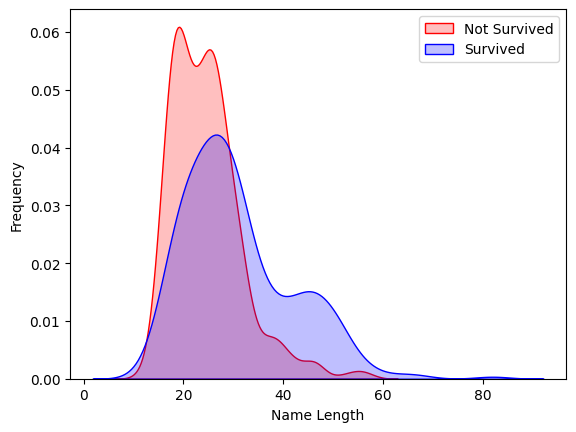

In [263]:
g = sns.kdeplot(train_df['Name_Length'][(train_df['Survived'] == 0) & (train_df['Name_Length'].notnull())], color='Red', fill=True)
g = sns.kdeplot(train_df['Name_Length'][(train_df['Survived'] == 1) & (train_df['Name_Length'].notnull())], ax=g, color='Blue', fill=True)
g.set_xlabel('Name Length')
g.set_ylabel('Frequency')
g=g.legend(['Not Survived', 'Survived'])

In [264]:
train_df['Name_LengthGB'] = pd.qcut(train_df['Name_Length'], 8)
test_df['Name_LengthGB'] = pd.qcut(test_df['Name_Length'], 8)

In [265]:
train_df.groupby(['Name_LengthGB'], as_index=False)['Survived'].mean()

/var/folders/45/xrxp1w5d28gfw_8gw1_nzk8w0000gn/T/ipykernel_85583/554738133.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Name_LengthGB'], as_index=False)['Survived'].mean()


,Name_LengthGB,Survived
0,"(11.999, 18.0]",0.214286
1,"(18.0, 20.0]",0.252427
2,"(20.0, 23.0]",0.307692
3,"(23.0, 25.0]",0.346939
4,"(25.0, 27.25]",0.292929
5,"(27.25, 30.0]",0.428571
6,"(30.0, 38.0]",0.517241
7,"(38.0, 82.0]",0.745283


In [266]:
train_df.loc[train_df['Name_Length'] <= 18, 'Name_Size'] = 0
train_df.loc[(train_df['Name_Length'] > 18) & (train_df['Name_Length'] <= 20), 'Name_Size'] = 1
train_df.loc[(train_df['Name_Length'] > 20) & (train_df['Name_Length'] <= 23), 'Name_Size'] = 2
train_df.loc[(train_df['Name_Length'] > 23) & (train_df['Name_Length'] <= 25), 'Name_Size'] = 3
train_df.loc[(train_df['Name_Length'] > 25) & (train_df['Name_Length'] <= 2725), 'Name_Size'] = 4
train_df.loc[(train_df['Name_Length'] > 27.25) & (train_df['Name_Length'] <= 30), 'Name_Size'] = 5
train_df.loc[(train_df['Name_Length'] > 30) & (train_df['Name_Length'] <= 38), 'Name_Size'] = 6
train_df.loc[(train_df['Name_Length'] > 38) & (train_df['Name_Length'] <= 82.0), 'Name_Size'] = 7
train_df.loc[(train_df['Name_Length'] > 82), 'Name_Size']

test_df.loc[test_df['Name_Length'] <= 18, 'Name_Size'] = 0
test_df.loc[(test_df['Name_Length'] > 18) & (test_df['Name_Length'] <= 20), 'Name_Size'] = 1
test_df.loc[(test_df['Name_Length'] > 20) & (test_df['Name_Length'] <= 23), 'Name_Size'] = 2
test_df.loc[(test_df['Name_Length'] > 23) & (test_df['Name_Length'] <= 25), 'Name_Size'] = 3
test_df.loc[(test_df['Name_Length'] > 25) & (test_df['Name_Length'] <= 2725), 'Name_Size'] = 4
test_df.loc[(test_df['Name_Length'] > 27.25) & (test_df['Name_Length'] <= 30), 'Name_Size'] = 5
test_df.loc[(test_df['Name_Length'] > 30) & (test_df['Name_Length'] <= 38), 'Name_Size'] = 6
test_df.loc[(test_df['Name_Length'] > 38) & (test_df['Name_Length'] <= 82.0), 'Name_Size'] = 7
test_df.loc[(test_df['Name_Length'] > 82), 'Name_Size']

Series([], Name: Name_Size, dtype: float64)

In [267]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilySizeGroup,Age Cut,Fare Cut,Title,Name_Length,Name_LengthGB,Name_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,NaN,S,2,Very Smalll,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,C85,C,2,Very Smalll,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7.0
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,C123,S,2,Very Smalll,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7.0
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,NaN,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3.0


In [268]:
train_df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [269]:
train_df['TicketNumber'] = train_df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))
test_df['TicketNumber'] = test_df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))

In [270]:
train_df.groupby(['TicketNumber'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)

,TicketNumber,count,mean
464,347082,7,0.000000
196,2343,7,0.000000
94,1601,7,0.714286
168,2144,6,0.000000
468,347088,6,0.000000
...,...,...,...
271,2662,1,0.000000
272,2663,1,1.000000
273,2664,1,0.000000
276,2667,1,1.000000


In [271]:
train_df.groupby(['TicketNumber'])['TicketNumber'].transform('count')

0      1
1      1
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: TicketNumber, Length: 891, dtype: int64

In [272]:
train_df['TicketNumberCounts'] = train_df.groupby(['TicketNumber'])['TicketNumber'].transform('count')
test_df['TicketNumberCounts'] = test_df.groupby(['TicketNumber'])['TicketNumber'].transform('count')

In [273]:
train_df.groupby(['TicketNumberCounts'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)

,TicketNumberCounts,count,mean
0,1,544,0.295956
1,2,188,0.569149
2,3,66,0.712121
3,4,44,0.500000
6,7,21,0.238095
5,6,18,0.000000
4,5,10,0.000000


In [274]:
train_df['Ticket Location'] = np.where(train_df['Ticket'].str.split(pat=' ', expand=True)[1].notna(), train_df['Ticket'].str.split(pat=' ', expand=True)[0].apply(lambda x: x.strip()), 'Blank')
test_df['Ticket Location'] = np.where(test_df['Ticket'].str.split(pat=' ', expand=True)[1].notna(), test_df['Ticket'].str.split(pat=' ', expand=True)[0].apply(lambda x: x.strip()), 'Blank')

In [275]:
train_df['Ticket Location'].value_counts()

Ticket Location
Blank         665
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
SOTON/OQ        7
A/5.            7
CA              6
STON/O2.        6
C               5
F.C.C.          5
S.O.C.          5
SC/PARIS        5
SC/Paris        4
S.O./P.P.       3
PP              3
A/4.            3
A/4             3
SC/AH           3
A./5.           2
SOTON/O2        2
A.5.            2
WE/P            2
S.C./PARIS      2
P/PP            2
F.C.            1
SC              1
S.W./PP         1
A/S             1
Fa              1
SCO/W           1
SW/PP           1
W/C             1
S.C./A.4.       1
S.O.P.          1
A4.             1
W.E.P.          1
SO/C            1
S.P.            1
C.A./SOTON      1
Name: count, dtype: int64

In [276]:
train_df['Ticket Location'] = train_df['Ticket Location'].replace({
    'SOTON/O.Q.': 'SOTON/OQ',
    'C.A.': 'CA',
    'CA.': 'CA',
    'SC/PARIS': 'SC/Paris',
    'S.C./PARIS': 'SC/Paris',
    'A/4.': 'A/4',
    'A./5.': 'A/5',
    'A.5.': 'A/5',
    'A/5.': 'A/5',
    'W./C.': 'W/C'
})

test_df['Ticket Location'] = test_df['Ticket Location'].replace({
    'SOTON/O.Q.': 'SOTON/OQ',
    'C.A.': 'CA',
    'CA.': 'CA',
    'SC/PARIS': 'SC/Paris',
    'S.C./PARIS': 'SC/Paris',
    'A/4.': 'A/4',
    'A./5.': 'A/5',
    'A.5.': 'A/5',
    'A/5.': 'A/5',
    'W./C.': 'W/C'
})

In [277]:
train_df.groupby(['Ticket Location'], as_index=False)['Survived'].agg(['count', 'mean'])

,Ticket Location,count,mean
0,A/4,6,0.000000
1,A/5,21,0.095238
2,A/S,1,0.000000
3,A4.,1,0.000000
4,Blank,665,0.383459
5,C,5,0.400000
6,C.A./SOTON,1,0.000000
7,CA,41,0.341463
8,F.C.,1,0.000000
9,F.C.C.,5,0.800000


In [278]:
train_df['Cabin'] = train_df['Cabin'].fillna('U')
train_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in train_df['Cabin']])

test_df['Cabin'] = test_df['Cabin'].fillna('U')
test_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in test_df['Cabin']])

In [279]:
train_df.groupby(['Cabin'], as_index=False)['Survived'].agg(['count', 'mean'])

,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000
8,U,687,0.299854


In [280]:
train_df['Cabin Assigned'] = train_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)
test_df['Cabin Assigned'] = test_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)

In [281]:
train_df.groupby(['Cabin Assigned'], as_index=False)['Survived'].agg(['count', 'mean'])

,Cabin Assigned,count,mean
0,0,687,0.299854
1,1,204,0.666667


In [282]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age Cut,Fare Cut,Title,Name_Length,Name_LengthGB,Name_Size,TicketNumber,TicketNumberCounts,Ticket Location,Cabin Assigned
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,...,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2.0,21171,1,A/5,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,...,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7.0,17599,1,PC,1
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,...,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2.0,3101282,1,STON/O2.,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,...,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7.0,113803,2,Blank,1
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,...,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3.0,373450,1,Blank,0


In [283]:
train_df.shape

(891, 24)

In [284]:
test_df.shape

(418, 23)

In [285]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         891 non-null    int64   
 1   Survived            891 non-null    int64   
 2   Pclass              891 non-null    int64   
 3   Name                891 non-null    object  
 4   Sex                 891 non-null    object  
 5   Age                 714 non-null    float64 
 6   SibSp               891 non-null    int64   
 7   Parch               891 non-null    int64   
 8   Ticket              891 non-null    object  
 9   Fare                891 non-null    float64 
 10  Cabin               891 non-null    object  
 11  Embarked            889 non-null    object  
 12  FamilySize          891 non-null    int64   
 13  FamilySizeGroup     891 non-null    object  
 14  Age Cut             714 non-null    category
 15  Fare Cut            891 non-null    cate

In [286]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize',
       'FamilySizeGroup', 'Age Cut', 'Fare Cut', 'Title', 'Name_Length',
       'Name_LengthGB', 'Name_Size', 'TicketNumber', 'TicketNumberCounts',
       'Ticket Location', 'Cabin Assigned'],
      dtype='object')

In [287]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)



/var/folders/45/xrxp1w5d28gfw_8gw1_nzk8w0000gn/T/ipykernel_85583/1333645808.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
/var/folders/45/xrxp1w5d28gfw_8gw1_nzk8w0000gn/T/ipykernel_85583/1333645808.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

In [288]:
ohe = OneHotEncoder(sparse_output=False)
ode = OrdinalEncoder
SI = SimpleImputer(strategy='most_frequent')

In [289]:
ode_cols = ['Family_Size_Grouped']
ohe_cols = ['Sex', 'Embarked']


In [290]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Age Cut,Fare Cut,Title,Name_Length,Name_LengthGB,Name_Size,TicketNumber,TicketNumberCounts,Ticket Location,Cabin Assigned
0,892,3,"Kelly, Mr. James",male,5.0,0,0,330911,1.0,U,...,"(32.0, 39.0]","(7.758, 8.662]",Mr,16,"(12.999, 18.0]",0.0,330911,1,Blank,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,6.0,1,0,363272,0.0,U,...,"(39.0, 48.0]","(-0.001, 7.758]",Mrs,32,"(30.75, 41.0]",6.0,363272,1,Blank,0
2,894,2,"Myles, Mr. Thomas Francis",male,7.0,0,0,240276,2.0,U,...,"(48.0, 76.0]","(8.662, 14.454]",Mr,25,"(23.0, 25.0]",3.0,240276,1,Blank,0
3,895,3,"Wirz, Mr. Albert",male,3.0,0,0,315154,2.0,U,...,"(24.0, 27.0]","(7.758, 8.662]",Mr,16,"(12.999, 18.0]",0.0,315154,1,Blank,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,2.0,1,1,3101298,2.0,U,...,"(21.0, 24.0]","(8.662, 14.454]",Mrs,44,"(41.0, 63.0]",7.0,3101298,1,Blank,0


In [291]:
X = train_df.drop(['Survived'], axis=1)
y = train_df['Survived']
X_test = test_df.drop(['Age Cut', 'Fare Cut'], axis=1)


In [292]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=21)

In [293]:
ordinal_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])


In [294]:
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [295]:
col_trans = ColumnTransformer(transformers=[
    ('impute', SI, ['Age']),
    ('ordinal_pipeline', ordinal_pipeline, ode),
    ('ohe_pipeline', ohe_pipeline, ohe_cols),
    ('passthrough', 'passthrough', ['Pclass', 'TicketNumberCounts', 'Cabin Assigned', 'Name Size', 'Age'])
    ],
    remainder='drop',
    n_jobs=-1
)